In [1]:
#logistic regression is applied when we have yes/no as the answer
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits=load_digits()

#determining the total no. of images and labels

print("image data shape: ",digits.data.shape) #total no. of images=1797
print("label data shape: ",digits.target.shape) #digits from 0-9

image data shape:  (1797, 64)
label data shape:  (1797,)


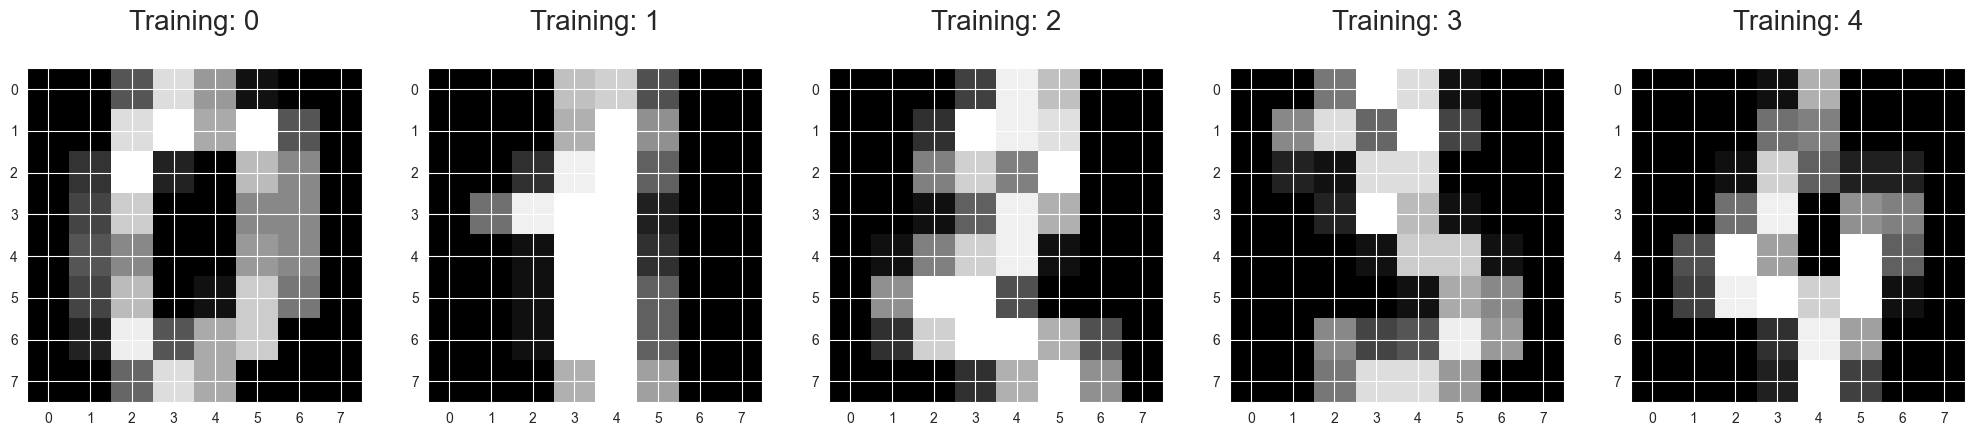

In [14]:
#generating images
plt.figure(figsize=(25,25))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1,5,index+1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize=20)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2) #77% of data for training 23% for testing

#y_train(dep) is the label and x_train(independent) are the features
#image ki basis pe batayega ke label kia hai
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
#Y_test/Y_train has no 64 because it just shows label

(1383, 64) (414, 64) (1383,) (414,)


In [24]:
#now we will use logistic regression to train our model first
from sklearn.linear_model import LogisticRegression
LogisticRegr=LogisticRegression(max_iter=1000)
LogisticRegr.fit(X_train, Y_train)

#predict for one observation(image)
print(LogisticRegr.predict(X_test[0].reshape(1,-1)))
print("Actual Label: ",Y_test[0])

[4]
Actual Label:  4


In [28]:
print(LogisticRegr.predict(X_test[0:10]))
print("Actual Label:", Y_test[0:10] )

[4 0 9 1 8 7 1 5 1 6]
Actual Label: [4 0 9 1 4 7 1 5 1 6]


In [29]:
#now checking accuracy
score=LogisticRegr.score(X_test, Y_test)
print(score)

0.9516908212560387


In [30]:
predictions=LogisticRegr.predict(X_test)
cm=metrics.confusion_matrix(Y_test,predictions) #compares X_test with Y_test and makes a matrix. diagonal means identified correctly (+1 for each correct answer) and taking first line as example 0 is identified correctly for 37 times and 1 means that 0 has been incorrectly identified as 4(counting index from 0)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  2  0  1  0  0  1 30]]
